In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pré Processamento

In [3]:
# Carregando dados
chromecast_data = pd.read_csv("./datasets/dataset_chromecast.csv")
smart_tv_data = pd.read_csv("./datasets/dataset_smart-tv.csv")

# Logaritmo nas taxas de upload e download. É somado 1 para evitar problemas com log10(0)
chromecast_data['log_bytes_up'] = np.log10(chromecast_data['bytes_up'] + 1)
chromecast_data['log_bytes_down'] = np.log10(chromecast_data['bytes_down'] + 1)
smart_tv_data['log_bytes_up'] = np.log10(smart_tv_data['bytes_up'] + 1)
smart_tv_data['log_bytes_down'] = np.log10(smart_tv_data['bytes_down'] + 1)

# Criando a coluna de hora
chromecast_data["hour"] = chromecast_data["date_hour"].apply(lambda x: int(x.split(" ")[1].split(":")[0]))
smart_tv_data["hour"] = smart_tv_data["date_hour"].apply(lambda x: int(x.split(" ")[1].split(":")[0]))


In [4]:
def check_and_create_directory(directory):
    """Função para verificar e criar diretório utilizado para salvar as figuras"""
    if not os.path.exists(directory):
        os.makedirs(directory)

# Checando e criando diretório para salvar os gráficos
check_and_create_directory('./results')

# Estatísticas Gerais

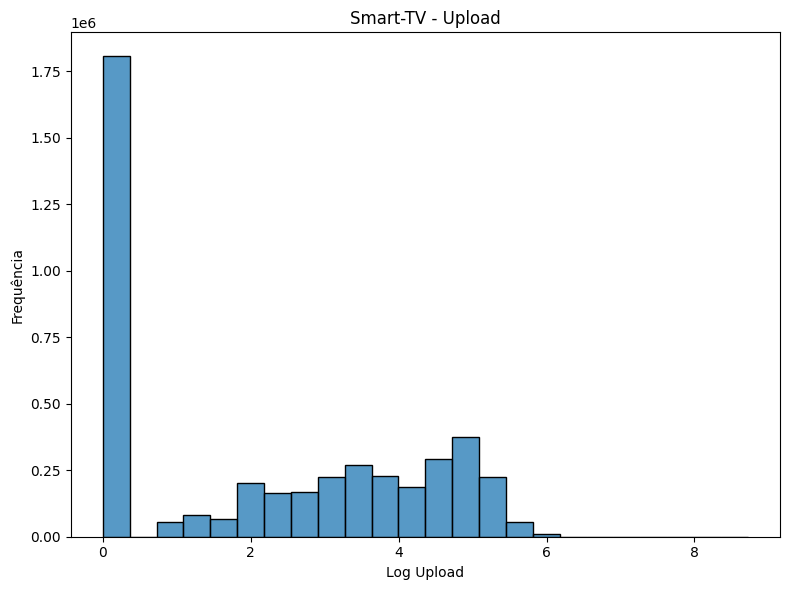

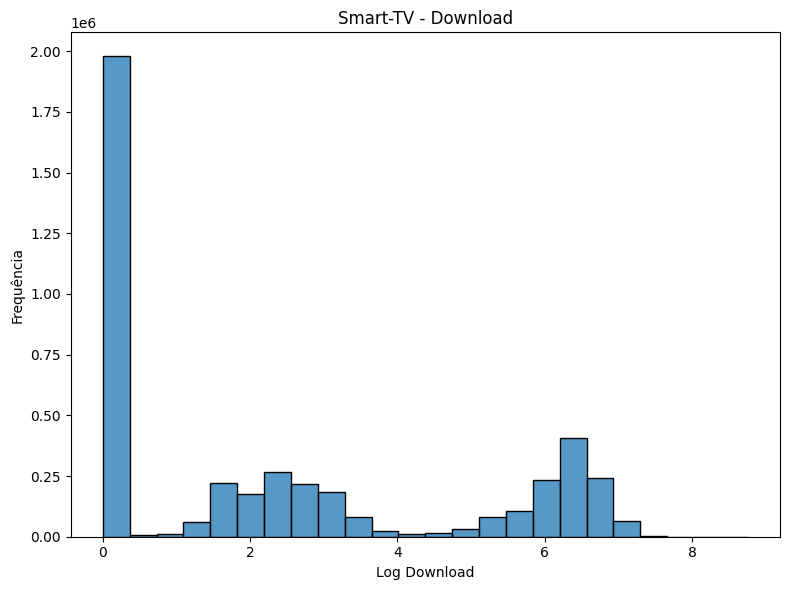

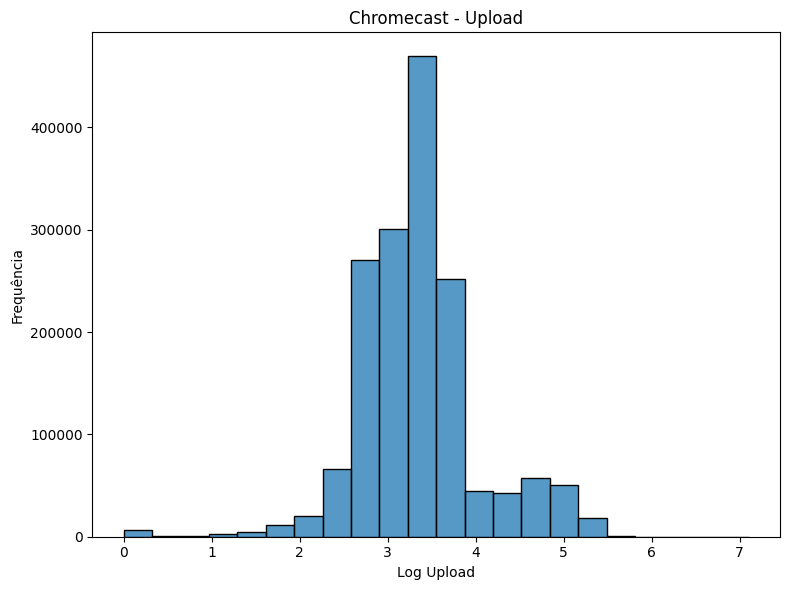

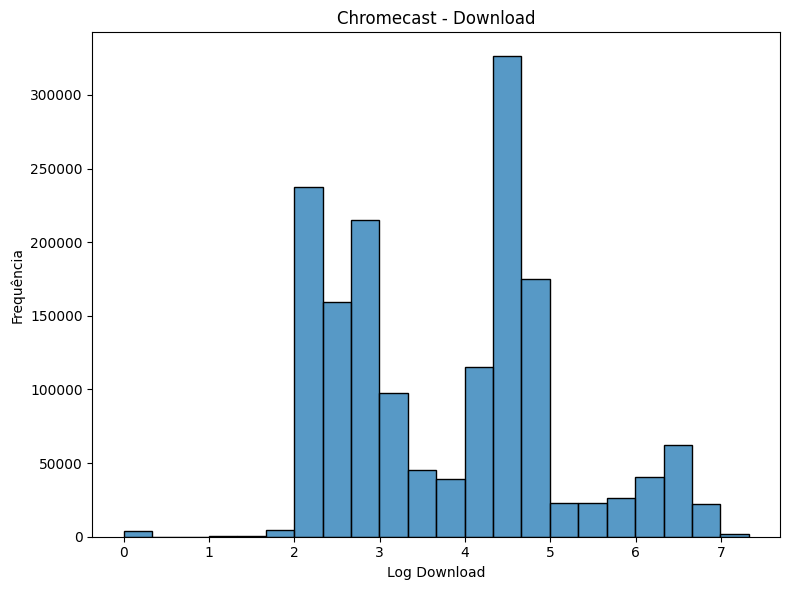

In [5]:
def sturges_rule(data):
    """Função para calcular o número ideal de bins usando o método de Sturges"""
    return int(np.ceil(1 + np.log2(len(data))))

def create_histogram(data, bins, title, xlabel, ylabel, save_path):
    """Função para plotar e salvar as imagens referentes aos histogramas"""
    plt.figure(figsize=(8, 6))
    sns.histplot(data, bins=bins, kde=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Estimativa do número de bins usando Sturges
num_bins_smart_tv = sturges_rule(smart_tv_data)
num_bins_chromecast = sturges_rule(chromecast_data)

# Gerando Histogramas
create_histogram(smart_tv_data['log_bytes_up'], num_bins_smart_tv, 'Smart-TV - Upload', 'Log Upload', 'Frequência', './results/histogram_smart_tv_upload.png')
create_histogram(smart_tv_data['log_bytes_down'], num_bins_smart_tv, 'Smart-TV - Download', 'Log Download', 'Frequência', './results/histogram_smart_tv_download.png')
create_histogram(chromecast_data['log_bytes_up'], num_bins_chromecast, 'Chromecast - Upload', 'Log Upload', 'Frequência', './results/histogram_chromecast_upload.png')
create_histogram(chromecast_data['log_bytes_down'], num_bins_chromecast, 'Chromecast - Download', 'Log Download', 'Frequência', './results/histogram_chromecast_download.png')

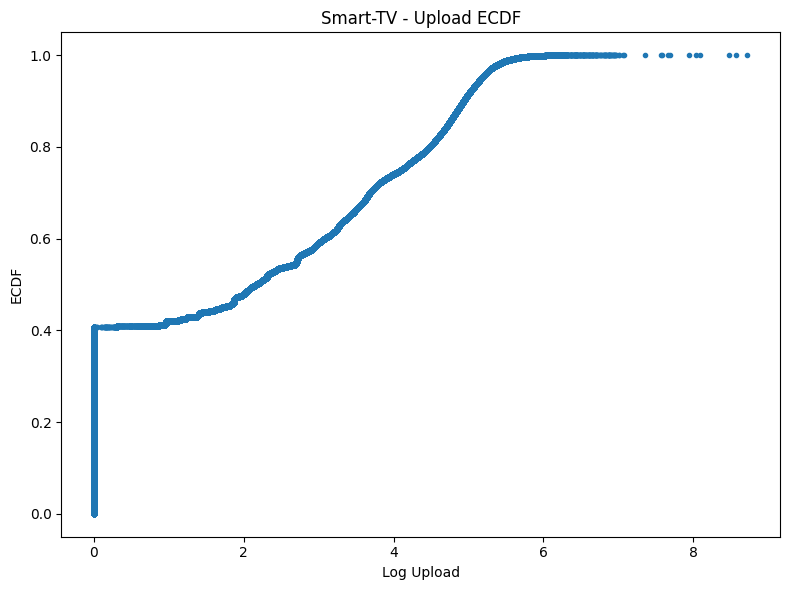

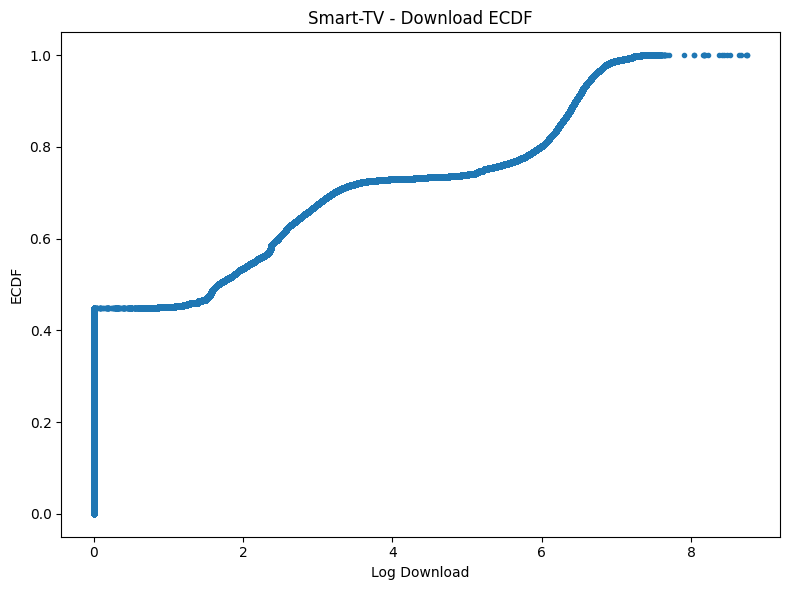

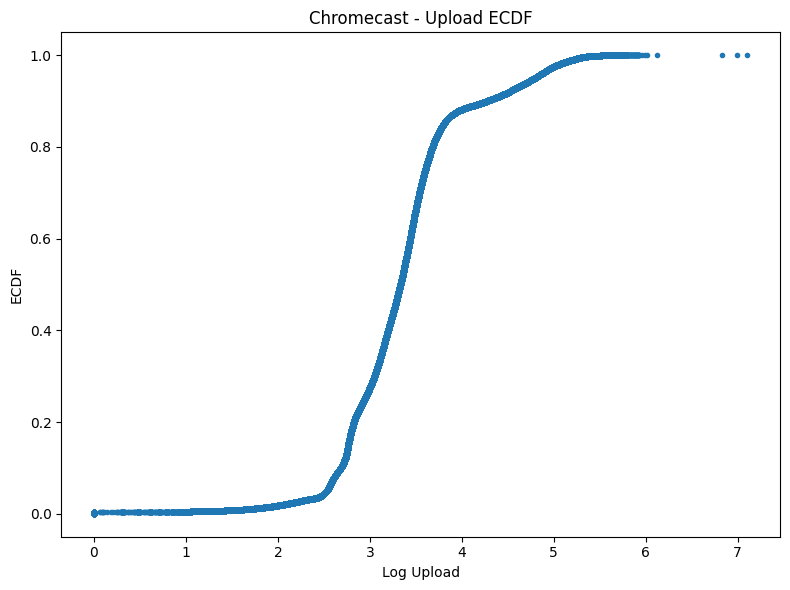

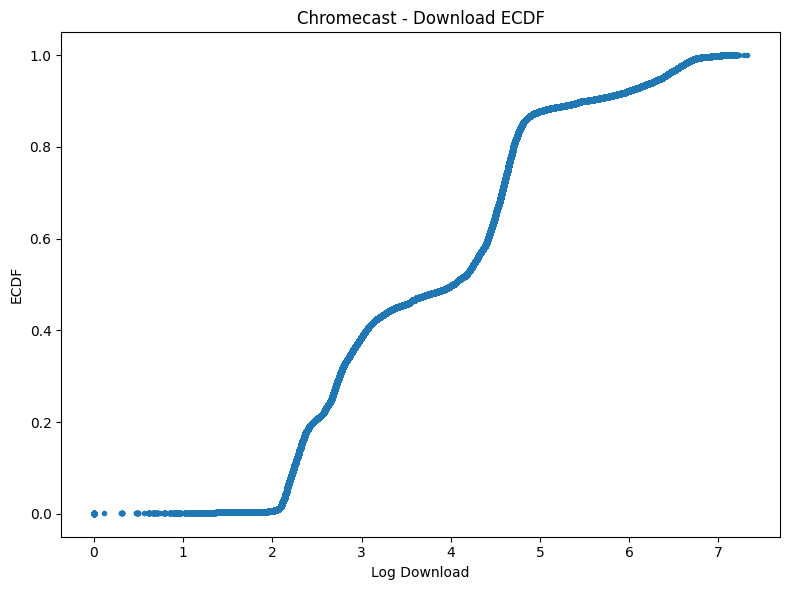

In [6]:
def ecdf(data):
    """Função Distribuição Empírica (ECDF)"""
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

def create_ecdf(data, title, xlabel, ylabel, save_path):
    """Função para plotar e salvar a imagem referente a
    função de distribuição cumulativa empírica (ECDF)"""
    plt.figure(figsize=(8, 6))
    x, y = ecdf(data)
    plt.plot(x, y, marker='.', linestyle='none')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Gerando ECDFs
create_ecdf(smart_tv_data['log_bytes_up'], 'Smart-TV - Upload ECDF', 'Log Upload', 'ECDF', './results/ecdf_smart_tv_upload.png')
create_ecdf(smart_tv_data['log_bytes_down'], 'Smart-TV - Download ECDF', 'Log Download', 'ECDF', './results/ecdf_smart_tv_download.png')
create_ecdf(chromecast_data['log_bytes_up'], 'Chromecast - Upload ECDF', 'Log Upload', 'ECDF', './results/ecdf_chromecast_upload.png')
create_ecdf(chromecast_data['log_bytes_down'], 'Chromecast - Download ECDF', 'Log Download', 'ECDF', './results/ecdf_chromecast_download.png')

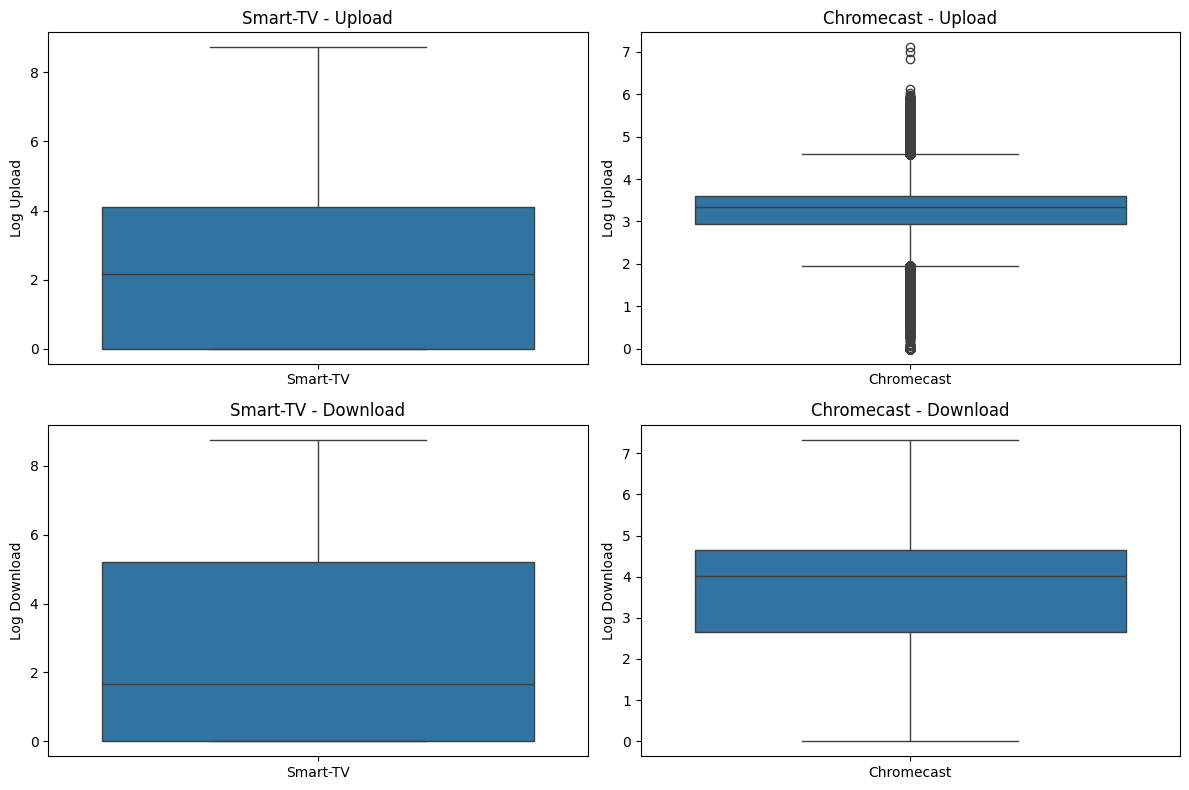

In [7]:
def create_combined_boxplot(data, save_path):
    """Função para criar um único gráfico com quatro box plots organizados em 2x2"""
    plt.figure(figsize=(12, 8))

    # Box plot para Smart-TV - Upload
    plt.subplot(2, 2, 1)
    sns.boxplot(x='device', y='log_bytes_up', data=data[data['device'] == 'Smart-TV'])
    plt.title('Smart-TV - Upload')
    plt.xlabel('')
    plt.ylabel('Log Upload')

    # Box plot para Chromecast - Upload
    plt.subplot(2, 2, 2)
    sns.boxplot(x='device', y='log_bytes_up', data=data[data['device'] == 'Chromecast'])
    plt.title('Chromecast - Upload')
    plt.xlabel('')
    plt.ylabel('Log Upload')

    # Box plot para Smart-TV - Download
    plt.subplot(2, 2, 3)
    sns.boxplot(x='device', y='log_bytes_down', data=data[data['device'] == 'Smart-TV'])
    plt.title('Smart-TV - Download')
    plt.xlabel('')
    plt.ylabel('Log Download')

    # Box plot para Chromecast - Download
    plt.subplot(2, 2, 4)
    sns.boxplot(x='device', y='log_bytes_down', data=data[data['device'] == 'Chromecast'])
    plt.title('Chromecast - Download')
    plt.xlabel('')
    plt.ylabel('Log Download')

    # Ajustar layout para melhor visualização
    plt.tight_layout()

    # Salva a figura
    plt.savefig(save_path)

    # Exibe o gráfico
    plt.show()

# Criar dados combinados para os box plots
combined_data = pd.concat([smart_tv_data.assign(device='Smart-TV'), chromecast_data.assign(device='Chromecast')])

# Gerar o box plot combinado
create_combined_boxplot(combined_data, './results/general_combined_box_plots.png')


In [8]:
def print_stats(data, device_name):
    """Cálculo das estatísticas descritivas"""
    print(f"\nEstatísticas para {device_name} - Upload:")
    print(data['log_bytes_up'].describe())
    print(f"\nEstatísticas para {device_name} - Download:")
    print(data['log_bytes_down'].describe())

# Imprimir estatísticas para ambos os dispositivos
print_stats(smart_tv_data, 'Smart-TV')
print_stats(chromecast_data, 'Chromecast')


Estatísticas para Smart-TV - Upload:
count    4.417903e+06
mean     2.158288e+00
std      2.027348e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.164551e+00
75%      4.100773e+00
max      8.721107e+00
Name: log_bytes_up, dtype: float64

Estatísticas para Smart-TV - Download:
count    4.417903e+06
mean     2.351679e+00
std      2.592552e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.659395e+00
75%      5.218385e+00
max      8.755698e+00
Name: log_bytes_down, dtype: float64

Estatísticas para Chromecast - Upload:
count    1.620529e+06
mean     3.350300e+00
std      6.782099e-01
min      0.000000e+00
25%      2.941611e+00
50%      3.332479e+00
75%      3.601850e+00
max      7.104713e+00
Name: log_bytes_up, dtype: float64

Estatísticas para Chromecast - Download:
count    1.620529e+06
mean     3.800046e+00
std      1.289921e+00
min      0.000000e+00
25%      2.661385e+00
50%      4.025046e+00
75%      4.638829e+00
max      7.326115e+00
Name: log_bytes_down, dtype: 

# Estatísticas por Horário

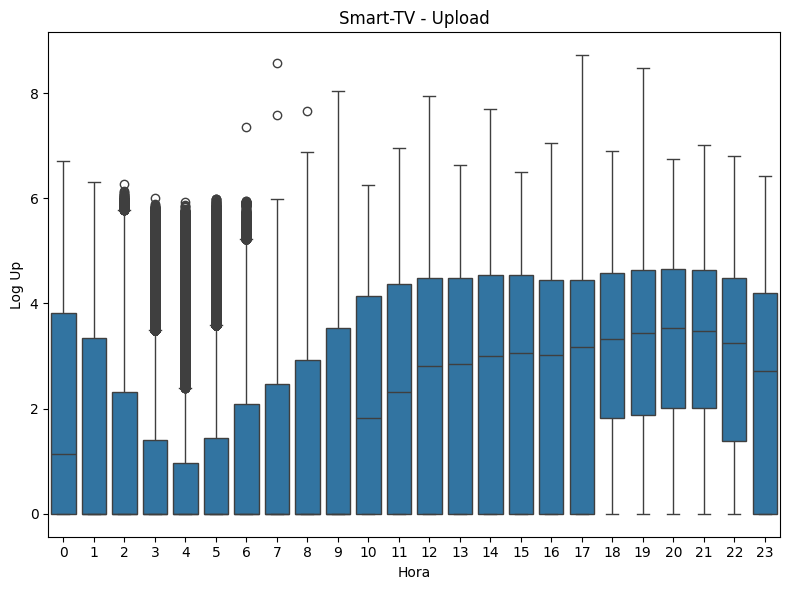

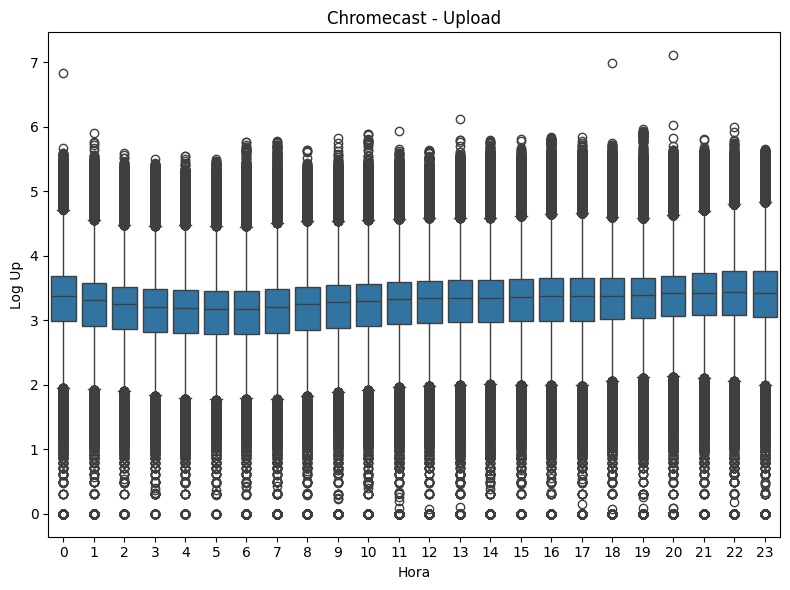

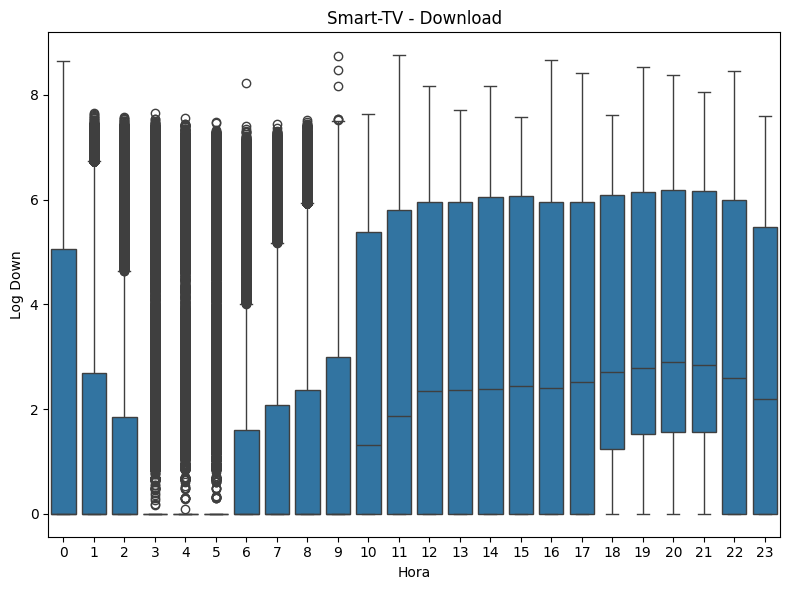

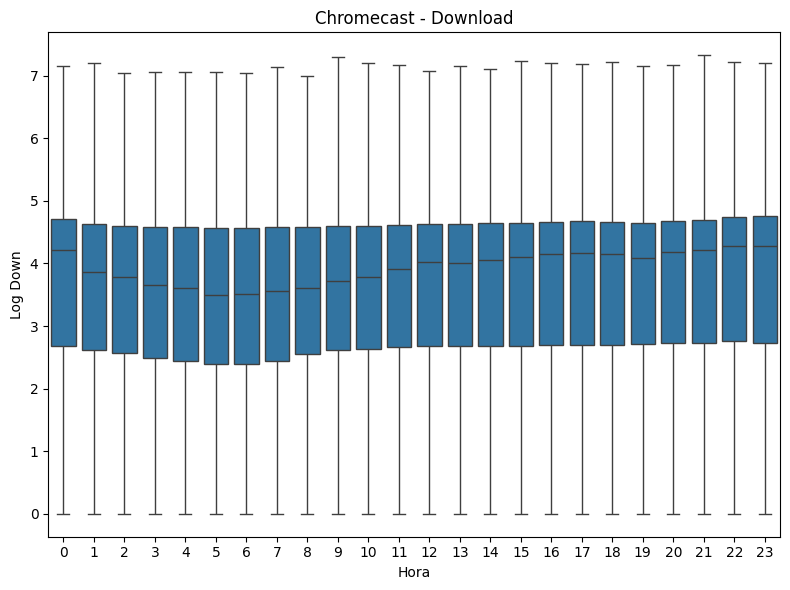

In [9]:
def create_boxplot_by_hour(data, device, rate_type, file_path):
    """
    Função para gerar boxplots de upload ou download por hora para um dispositivo específico (Smart-TV ou Chromecast).
    
    Parâmetros:
    - data: DataFrame com os dados a serem plotados.
    - device: Nome do dispositivo (ex: 'Smart-TV' ou 'Chromecast').
    - rate_type: Tipo de taxa (ex: 'upload' ou 'download').
    - file_path: Caminho para salvar o gráfico gerado.
    """
    # Definir o título e rótulos com base nos parâmetros
    title = f'{device} - {rate_type.capitalize()}load'
    xlabel = 'Hora'
    ylabel = f'Log {rate_type.capitalize()}'

    # Criar o gráfico
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='hour', y=f'log_bytes_{rate_type}', data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    
    # Salvar e mostrar o gráfico
    plt.savefig(file_path)
    plt.show()

# Gerando os boxplots para Smart-TV e Chromecast
create_boxplot_by_hour(smart_tv_data, 'Smart-TV', 'up', './results/smart_tv_upload_boxplot.png')
create_boxplot_by_hour(chromecast_data, 'Chromecast', 'up', './results/chromecast_upload_boxplot.png')
create_boxplot_by_hour(smart_tv_data, 'Smart-TV', 'down', './results/smart_tv_download_boxplot.png')
create_boxplot_by_hour(chromecast_data, 'Chromecast', 'down', './results/chromecast_download_boxplot.png')

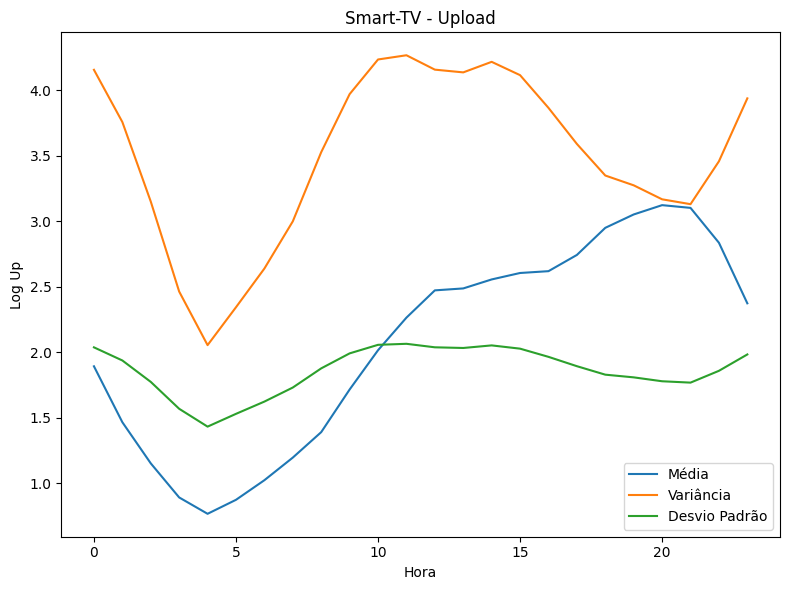

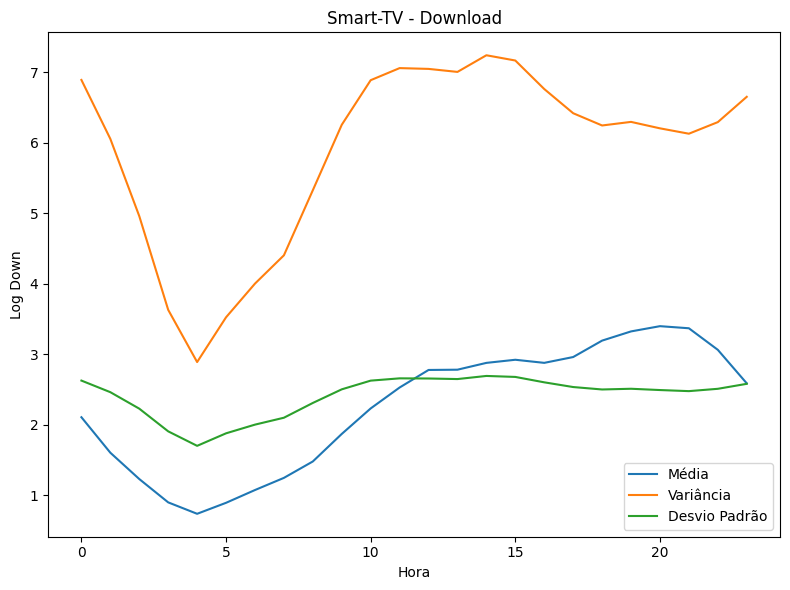

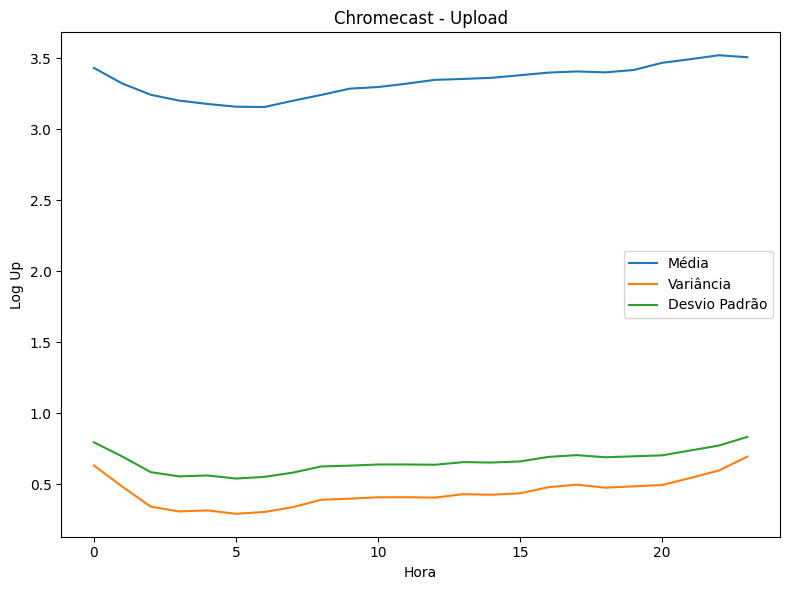

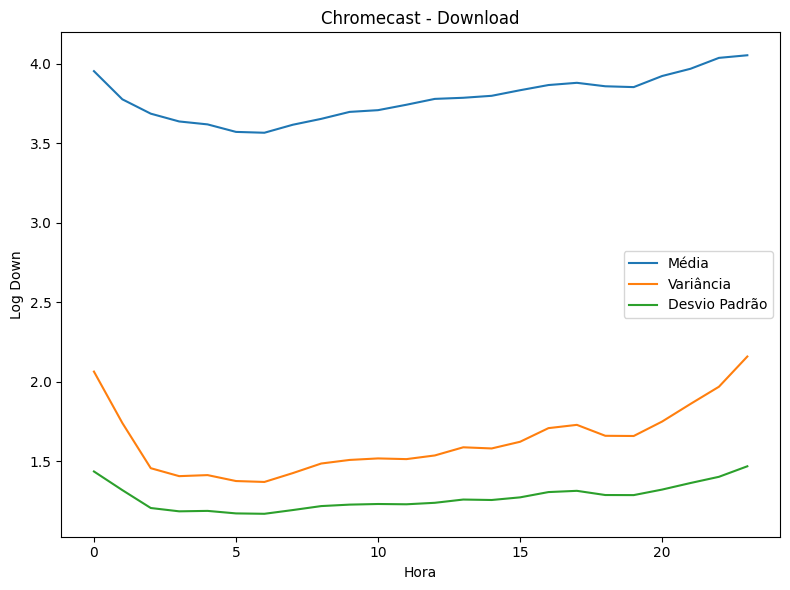

In [10]:
def plot_statistics(agg_data, device, rate_type, file_path):
    """
    Função para plotar gráficos de média, variância e desvio padrão por hora para um dispositivo específico (Smart-TV ou Chromecast).
    
    Parâmetros:
    - agg_data: DataFrame agregado com as estatísticas (média, variância, desvio padrão).
    - device: Nome do dispositivo (ex: 'Smart-TV' ou 'Chromecast').
    - rate_type: Tipo de taxa (ex: 'upload' ou 'download').
    - file_path: Caminho para salvar o gráfico gerado.
    """
    # Definir o título e rótulos com base nos parâmetros
    title = f'{device} - {rate_type.capitalize()}load'
    xlabel = 'Hora'
    ylabel = f'Log {rate_type.capitalize()}'

    # Plotar gráfico para média, variância e desvio padrão
    plt.figure(figsize=(8, 6))
    plt.plot(agg_data['hour'], agg_data[f'log_bytes_{rate_type}']['mean'], label='Média')
    plt.plot(agg_data['hour'], agg_data[f'log_bytes_{rate_type}']['var'], label='Variância')
    plt.plot(agg_data['hour'], agg_data[f'log_bytes_{rate_type}']['std'], label='Desvio Padrão')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()

    # Salvar e mostrar o gráfico
    plt.savefig(file_path)
    plt.show()

# Criar DataFrames agregados por hora e tipo de dispositivo
agg_smart_tv = smart_tv_data.groupby('hour').agg({'log_bytes_up': ['mean', 'var', 'std'],
                                                  'log_bytes_down': ['mean', 'var', 'std']}).reset_index()

agg_chromecast = chromecast_data.groupby('hour').agg({'log_bytes_up': ['mean', 'var', 'std'],
                                                      'log_bytes_down': ['mean', 'var', 'std']}).reset_index()

# Gerar gráficos para Smart-TV e Chromecast

# Smart-TV - Upload
plot_statistics(agg_smart_tv, 'Smart-TV', 'up', './results/smart_tv_upload_statistics.png')

# Smart-TV - Download
plot_statistics(agg_smart_tv, 'Smart-TV', 'down', './results/smart_tv_download_statistics.png')

# Chromecast - Upload
plot_statistics(agg_chromecast, 'Chromecast', 'up', './results/chromecast_upload_statistics.png')

# Chromecast - Download
plot_statistics(agg_chromecast, 'Chromecast', 'down', './results/chromecast_download_statistics.png')

# 4. Caracterizando os horários com maior valor de tráfego

In [11]:
# Encontrar os horários com maior média para taxa de upload e download para Smart-TV
max_mean_upload_smart_tv_hour = agg_smart_tv['log_bytes_up']['mean'].idxmax()
max_mean_download_smart_tv_hour = agg_smart_tv['log_bytes_down']['mean'].idxmax()

# Encontrar os horários com maior média para taxa de upload e download para Chromecast
max_mean_upload_chromecast_hour = agg_chromecast['log_bytes_up']['mean'].idxmax()
max_mean_download_chromecast_hour = agg_chromecast['log_bytes_down']['mean'].idxmax()

# Filtrar os dados originais para os horários escolhidos
dataset_upload_smart_tv = smart_tv_data[smart_tv_data['hour'] == max_mean_upload_smart_tv_hour]
dataset_download_smart_tv = smart_tv_data[smart_tv_data['hour'] == max_mean_download_smart_tv_hour]

dataset_upload_chromecast = chromecast_data[chromecast_data['hour'] == max_mean_upload_chromecast_hour]
dataset_download_chromecast = chromecast_data[chromecast_data['hour'] == max_mean_download_chromecast_hour]

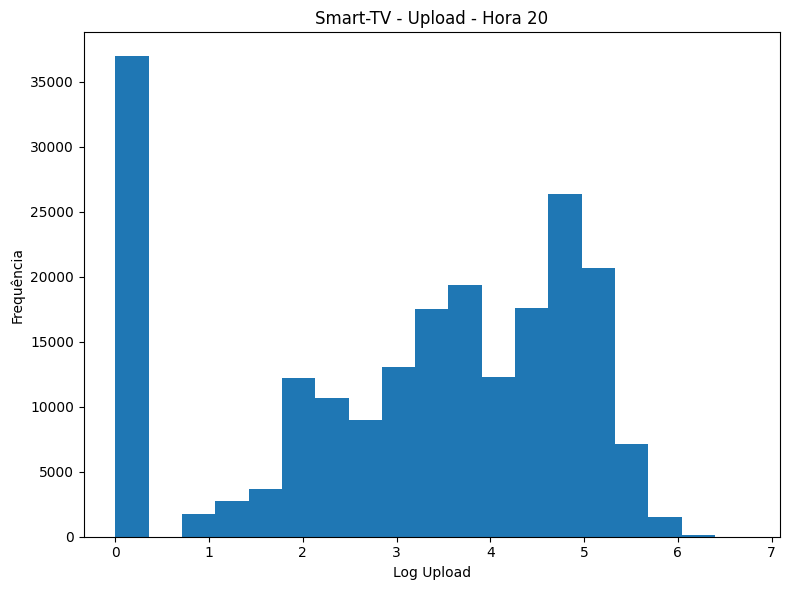

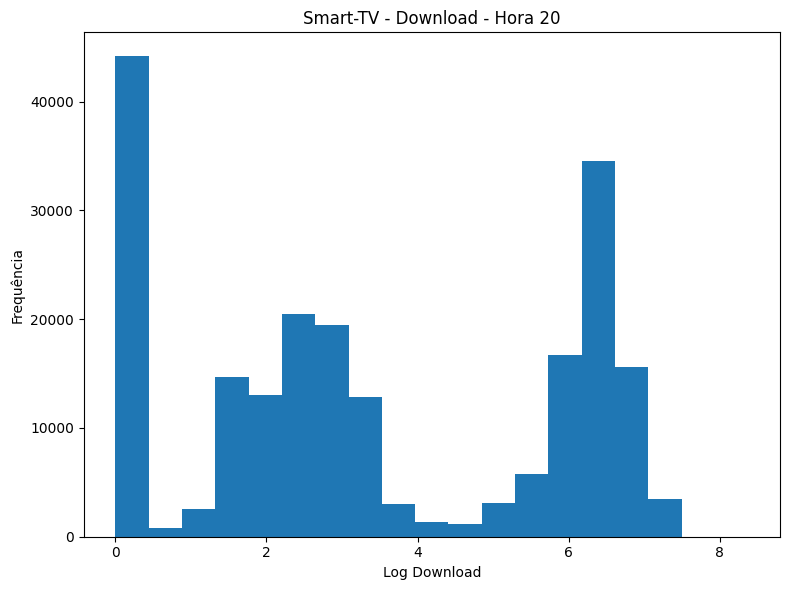

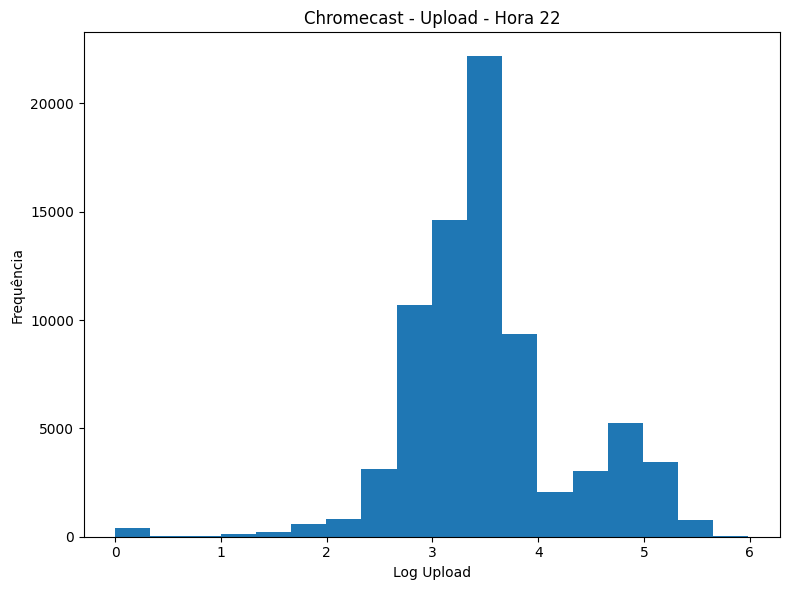

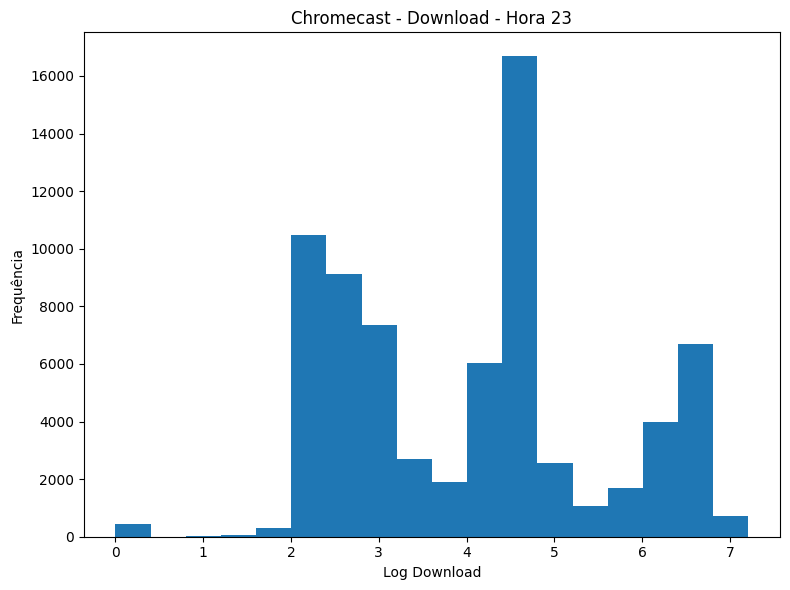

In [12]:
def plot_histogram(data, column, device, rate_type, hour, file_path):
    """
    Função para plotar o histograma de upload/download para um dispositivo e hora específicos.

    Parâmetros:
    - data: Dataframe contendo os dados.
    - column: Coluna alvo.
    - device: Nome do dispositivo (ex: 'Smart-TV', 'Chromecast').
    - rate_type: Tipo de operação (ex: 'Download', 'Upload').
    - hour: Hora de referência dos dados do dataset.
    - file_path: Caminho onde o gráfico será salvo.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=sturges_rule(data[column]))
    plt.title(f'{device} - {rate_type.capitalize()} - Hora {hour}')
    plt.xlabel(f'Log {rate_type.capitalize()}')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.savefig(file_path)
    plt.show()

# Plotar histogramas para Smart-TV e Chromecast

# Smart-TV - Upload
plot_histogram(dataset_upload_smart_tv, 'log_bytes_up', 'Smart-TV', 'upload', max_mean_upload_smart_tv_hour, './results/smart_tv_upload_histogram_max_traffic.png')

# Smart-TV - Download
plot_histogram(dataset_download_smart_tv, 'log_bytes_down', 'Smart-TV', 'download', max_mean_download_smart_tv_hour, './results/smart_tv_download_histogram_max_traffic.png')

# Chromecast - Upload
plot_histogram(dataset_upload_chromecast, 'log_bytes_up', 'Chromecast', 'upload', max_mean_upload_chromecast_hour, './results/chromecast_upload_histogram_max_traffic.png')

# Chromecast - Download
plot_histogram(dataset_download_chromecast, 'log_bytes_down', 'Chromecast', 'download', max_mean_download_chromecast_hour, './results/chromecast_download_histogram_max_traffic.png')


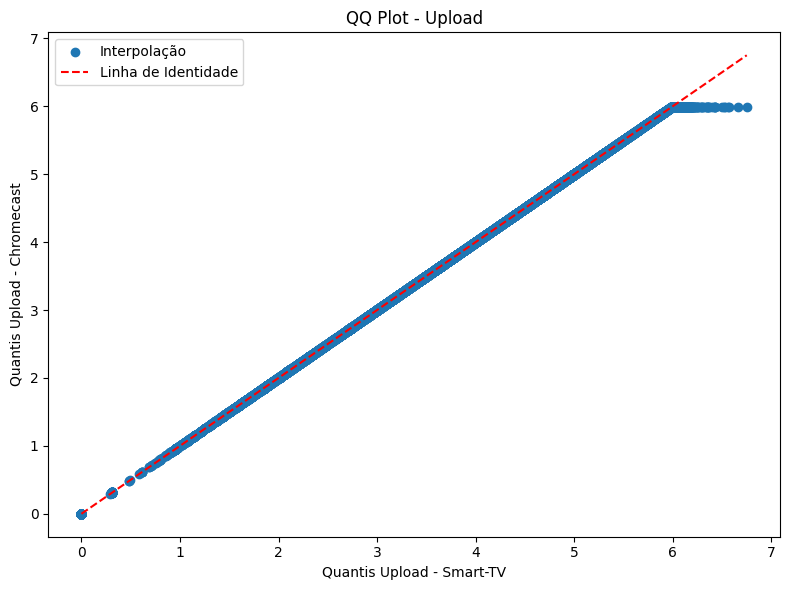

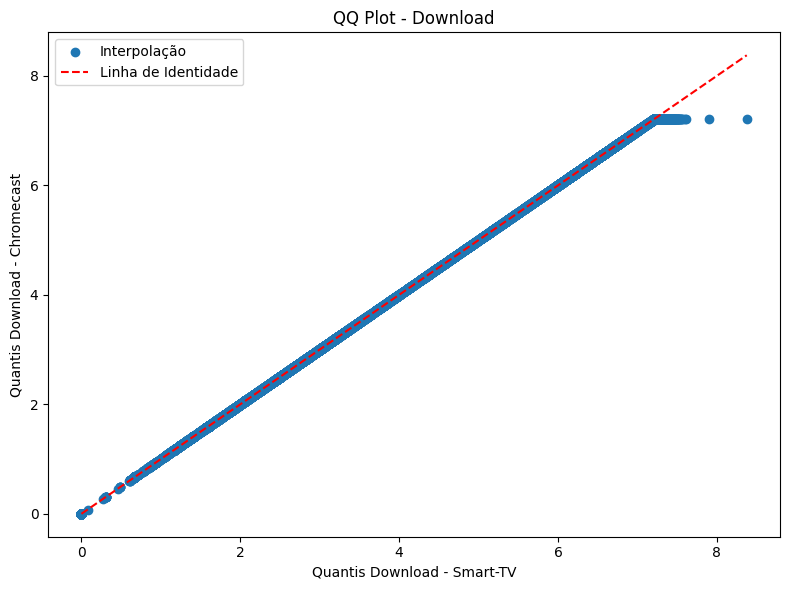

In [13]:
def plot_qq(data1, data2, rate_type, file_path):
    """
    Função para gerar o gráfico QQ Plot comparando dois datasets.

    Parâmetros:
    - data1: Dados do primeiro dataset à comparar.
    - data2: Dados do segundo dataset à comparar.
    - rate_type: Tipo de operação (ex: 'Download', 'Upload').
    - file_path: Caminho onde o gráfico será salvo.
    """
    # Ordenar os dados
    data1_sorted = np.sort(data1)
    data2_sorted = np.sort(data2)

    # Calcular os quantis do primeiro dataset
    quantiles1 = np.percentile(data1_sorted, np.linspace(0, 100, len(data1_sorted)))

    # Interpolação para o segundo dataset
    interpolated_values = np.interp(quantiles1, data2_sorted, data2_sorted)

    # Plotar QQ Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(quantiles1, interpolated_values, label='Interpolação')
    plt.plot([min(quantiles1), max(quantiles1)], [min(quantiles1), max(quantiles1)], color='r', linestyle='--', label='Linha de Identidade')
    plt.title(f'QQ Plot - {rate_type.capitalize()}')
    plt.xlabel(f'Quantis {rate_type.capitalize()} - Smart-TV')
    plt.ylabel(f'Quantis {rate_type.capitalize()} - Chromecast')
    plt.legend()
    plt.tight_layout()
    plt.savefig(file_path)
    plt.show()

# QQ Plot para Upload (Smart-TV vs Chromecast)
plot_qq(dataset_upload_smart_tv['log_bytes_up'], dataset_upload_chromecast['log_bytes_up'], 'upload', './results/qqplot_upload.png')

# QQ Plot para Download (Smart-TV vs Chromecast)
plot_qq(dataset_download_smart_tv['log_bytes_down'], dataset_download_chromecast['log_bytes_down'], 'download', './results/qqplot_download.png')


# 5 Análise da correlação entre as taxas de upload e download para os horários com o maior valor de tráfego

In [14]:
corr_smart_tv = chromecast_data['log_bytes_up'].corr(chromecast_data['log_bytes_down'])
corr_chromecast = chromecast_data['log_bytes_up'].corr(chromecast_data['log_bytes_down'])

print(f"Correlação para Smart-TV: {corr_upload_smart_tv}")
print(f"Correlação para Chromecast: {corr_upload_chromecast}")

NameError: name 'corr_upload_smart_tv' is not defined

In [ ]:
def plot_scatter(data_upload, data_download, device_name, save_path):
    """
    Função para gerar um scatter plot comparando as taxas de upload e download.

    Parâmetros:
    - data_upload: Dados da taxa de upload.
    - data_download: Dados da taxa de download.
    - device_name: Nome do dispositivo (ex: 'Smart-TV', 'Chromecast').
    - save_path: Caminho onde o gráfico será salvo.
    """
    plt.figure(figsize=(8, 6))

    # Criar o scatter plot
    sns.scatterplot(x=data_upload, y=data_download)
    plt.title(f'{device_name} - Upload vs Download')
    plt.xlabel('Log Upload')
    plt.ylabel('Log Download')
    
    # Salvar o gráfico
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Exemplo de uso da função para o Scatter plot da Smart-TV
plot_scatter(dataset_upload_smart_tv['log_bytes_up'], dataset_download_smart_tv['log_bytes_down'], 'Smart-TV', './results/scatter_plot_smart_tv.png')

# Exemplo de uso da função para o Scatter plot do Chromecast
# Obs: Foi utilizado o dataset original pois o de upload e download estava retornando um scatter plot vazio
plot_scatter(chromecast_data['log_bytes_up'], chromecast_data['log_bytes_down'], 'Chromecast', './results/scatter_plot_chromecast.png')
